In [175]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_all = []
data = []
with open("data/myspace.csv") as f:
    read = csv.reader(f)
    for row in read:
        data_all.append(row)
        data.append(int(row[1]))

data = np.array(data)
print(len(data_all))

480


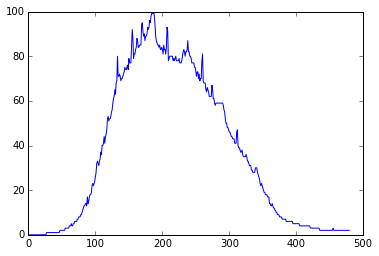

In [3]:
plt.plot(data)

In [4]:
np.sum(data)

17293

In [5]:
fake_data = []
v = 0
for h in data:
    if h != 0:
        for i in range(h):
            fake_data.append(v)
    v += 1

In [133]:
np.exp(np.mean(np.log(dd)))

204.92868284601144

In [307]:
dd = np.asarray(fake_data)

def delta_1(ka, d, N):
    k = ka[0]
    a = ka[1]
    
    d_a = d/a
    
    del_k = (N/k) - (N*np.log(a)) + np.sum(np.log(d)) - np.sum(np.power(d_a, k) * np.log(d_a))
    del_a = (k/a) * (np.sum(np.power(d_a, k)) - N)
    
    return np.array([1*del_k, 1*del_a])

def delta_2(ka, d, N):
    k = ka[0]
    a = ka[1]
    
    d_a = d/a
    
    del2_k = -1 * (N/(k*k)) - np.sum(np.power(d_a, k) * np.power(np.log(d_a), 2))
    del2_a = (k/a*a) * (N - ((k + 1) * np.sum(np.power(d_a, k))))
    del2_ka = ((1/a) * np.sum(np.power(d_a, k))) + ((k/a) * np.sum(np.power(d_a, k) * np.log(d_a))) - N/a
    
    return np.array([[del2_k, del2_ka], [del2_ka, del2_a]])

def fit_weibull(data, seed_k=None, seed_a=None, n_iter=30, change_thresh=1e-3 ):
    N = data.size
    k_ = 1
    a_ = np.mean(data)
    if seed_k is not None:
        k_ = seed_k
        
    if seed_a is not None:
        a_ = seed_a
        
    ka = np.array([k_, a_]).astype(np.float)
    
    ka_err = np.array([np.inf, np.inf])
    thresh = np.ones(2) * change_thresh
    max_iter = n_iter
    i = 0
    
    err = []
    
    while (np.any(ka_err > thresh)) and i < max_iter:
        i += 1
        
        del_1 = delta_1(ka, data, N)
        del_2 = delta_2(ka, data, N)
        
        ka_err = np.dot((np.linalg.inv(del_2)), del_1)
        
        ka -= ka_err
        
        err.append(ka_err)
        ka_err = abs(ka_err)
#         err.append(ka_err)
    
#     print(i)
#     print(ka_err)
#     print(ka[1] - (np.sum(np.power(data, ka[0]))/N))
    return (ka[0], ka[1], err)

In [299]:
k, a, err = fit_weibull(dd, seed_k=1, seed_a=231.7)
print(k, a)

5
[  1.96405427e-05   1.64406494e-04]
-18984807.823
3.05397749363 231.700020359


In [314]:
k = []
a = []

for v in np.linspace(1, 231, 1000):
    k_, a_, _ = fit_weibull(dd, seed_k=1, seed_a=v)
    k.append(k_)
    a.append(a_)
    

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in log
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in power
/Users/myrmidon/.co

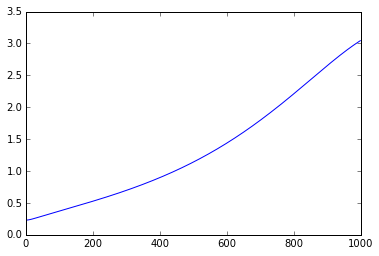

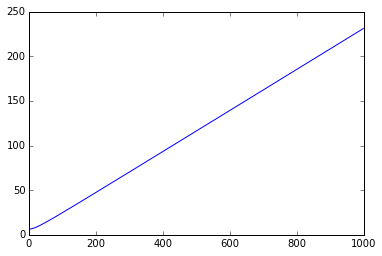

In [315]:
plt.figure()
plt.plot(k)
plt.figure()
plt.plot(a)

In [310]:
k = []
a = []

for v in np.linspace(1, 200, 1000):
    k_, a_, _ = fit_weibull(dd, seed_k=v, seed_a=231)
    k.append(k_)
    a.append(a_)
    

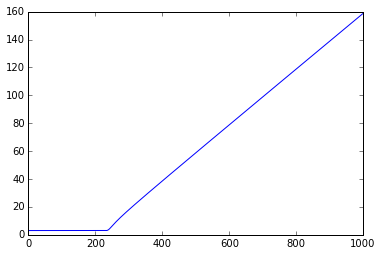

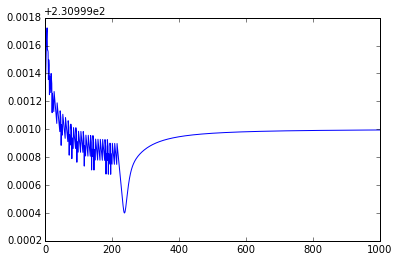

In [313]:
plt.figure()
plt.plot(k)
plt.figure()
plt.plot(a)

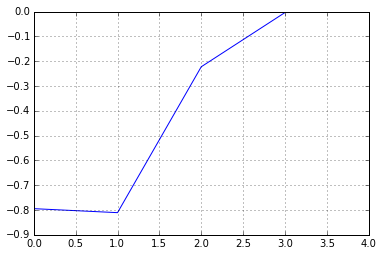

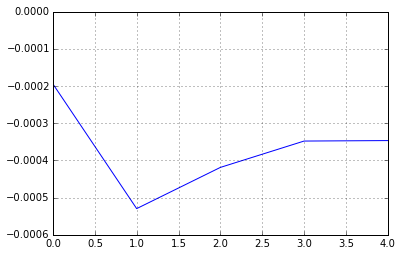

In [266]:
e_k = np.array([e[0] for e in err])
e_a = np.array([e[1] for e in err])
plt.figure()
plt.plot(e_k,'b')
plt.axhline(y=0)
plt.grid()
plt.figure()
plt.plot(e_a)
plt.axhline(y=0)
plt.grid()

In [267]:
e_a

array([-0.0001947 , -0.00052961, -0.00041885, -0.000348  , -0.00034671])

In [61]:
from scipy.stats import exponweib

(2.0072161515684459, 2.093674390738645, 14.293845612364436, 179.00895143065111)


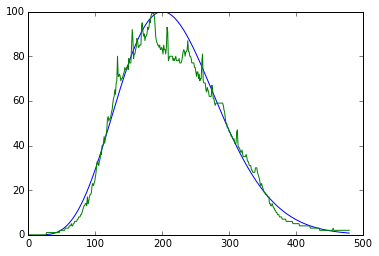

In [325]:
ff = exponweib.fit(dd, 1, 3, scale=1, loc=20)
print(ff)
df = exponweib.pdf(dd, *ff)
plt.plot(dd, data.max()*df/df.max())
plt.plot(data)
# _ = plt.hist(dd, bins=np.linspace(0, dd.max(), data.size), histtype='step', normed=True)

***

In [273]:
def weib_pdf(data, k, a):
    return (k/a) * np.power(data/a, (k-1)) * np.exp(-(np.power(data/a, k)))

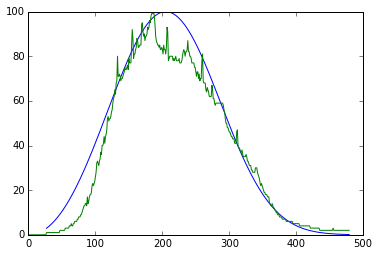

In [274]:
wpf = weib_pdf(dd, k, a)
plt.plot(dd, 100 * wpf / wpf.max())
plt.plot(data)

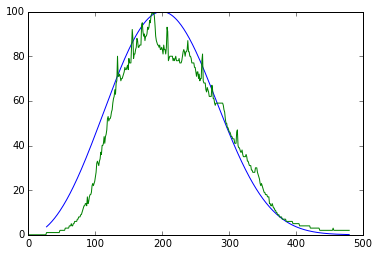

In [25]:
wpf = weib_pdf(dd, 2.99998203958, 228.08135705)
plt.plot(dd, 100 * wpf / wpf.max())
plt.plot(data)

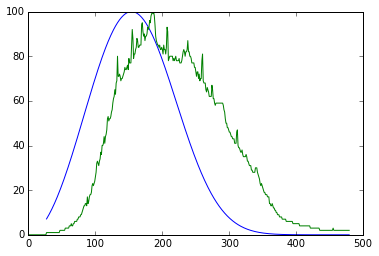

In [312]:
wpf = weib_pdf(dd, 2.89154481,  178.33360328 )
plt.plot(dd, 100 * wpf / wpf.max())
plt.plot(data)

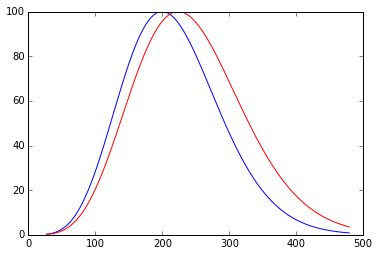

In [106]:
df = exponweib.pdf(dd, 2.5567578325685147, 2.0333230524292247, -2.0387030220680509, 178.85627834902073) 
df2 = exponweib.pdf(dd, k, 2.0333230524292247, -2.0387030220680509, a) 
plt.plot(dd, data.max()*df/df.max())
plt.plot(dd, data.max()*df2/df2.max(), 'r')

In [59]:
weib_pdf(0, k, a)

0.0